<a href="https://colab.research.google.com/github/hanubv/ML_Zoo/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

In [ ]:
#Downloading the training data and testing data
training_data = datasets.FashionMNIST(root = "data",
                                      train = True,
                                      download = True,
                                      transform = ToTensor(),
                                      #target_transform = Lambda(lambda y_train: torch.zeros(10, dtype = torch.float).scatter_(torch.tensor(y_train), value=1))
                                      )

testing_data  = datasets.FashionMNIST(root = "data",
                                      train = False,
                                      download = True,
                                      transform = ToTensor(),
                                      #target_transform = Lambda(lambda y_test: torch.zeros(10, dtype = torch.float).scatter_(torch.tensor(y_test), value =1))
                                      )

In [ ]:
#creating a dataloader
train_dataloader = DataLoader(training_data, batch_size = 64, shuffle =  True)
test_dataloader = DataLoader(testing_data, batch_size = 64, shuffle = True)

Input batch size is: torch.Size([64, 1, 28, 28])
labels batch size is: torch.Size([64])
torch.Size([28, 28])


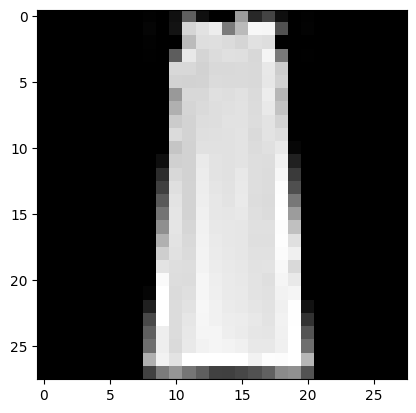

Label: 3


In [ ]:
#Iterating over the dataloader
train_features, train_labels = next(iter(train_dataloader))
print(f"Input batch size is: {train_features.size()}")  #Input batch size is: torch.Size([64, 1, 28, 28])
print(f"labels batch size is: {train_labels.size()}")   #labels batch size is: torch.Size([64])
img = train_features[0].squeeze()
print(img.size())
labels = train_labels[0]
plt.imshow(img, cmap='gray')
plt.show()
print(f"Label: {labels}")

In [ ]:
for i, (train_features, train_labels) in enumerate(train_dataloader):
    print(f"Batch: {i}, training_batch_size: {train_features.size()}, training_labels_size:{train_labels.size()} ")
"""
    img = train_features[0].squeeze()
    label = train_labels[0]
    plt.imshow(img, cmap = 'gray')
    plt.show()
    print(f"Label: {label}")
"""

In [ ]:
#Creating a Sequential Linear Model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_nw = nn.Sequential(
                                       nn.Linear(28*28, 512),
                                       nn.ReLU(),
                                       nn.Linear(512, 512),
                                       nn.ReLU(),
                                       nn.Linear(512, 10),
                                       )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_nw(x)
        return logits


model = NeuralNetwork()


In [ ]:
#epochs = 10
#learning_rate = 1e-3
#loss_fn = nn.CrossEntropyLoss()
#optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [ ]:
#Model Training
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (x,y) in enumerate(dataloader):
        pred = model(x)
        loss = loss_fn(pred, y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch%100 == 0:
            loss, counter = loss.item(), (batch+1)*len(x)
            print(f"loss: {loss:>7f} [{counter:>5d}/{size:>5d}]")

#Validating the model over test dataset
def test_loop(dataloader, model, loss_fn):
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
      for x, y in dataloader:
          pred = model(x)
          test_loss += loss_fn(pred, y).item()
          correct = correct+(pred.argmax(1)==y).type(torch.float).sum().item()


    test_loss = test_loss/num_batches
    correct = correct/size

    print(f"Test Error:\n Accuracy {(100*correct) :>0.01f}%, avg_loss {test_loss:>8f}\n ")

In [ ]:
#Model Hyper-parameters
epochs = 100
learning_rate = 1e-3
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

#Calling our training and testing model
for t in range(epochs):
    print(f"Epoch: {t+1}\n-----------------------")
    train_model = train_loop(train_dataloader, model, loss_fn, optimizer)
    test_model = test_loop(test_dataloader, model, loss_fn)

print("Done")



Epoch: 1
-----------------------
loss: 2.293675 [   64/60000]
loss: 2.295318 [ 6464/60000]
loss: 2.260496 [12864/60000]
loss: 2.268075 [19264/60000]
loss: 2.237509 [25664/60000]
loss: 2.219941 [32064/60000]
loss: 2.199709 [38464/60000]
loss: 2.200029 [44864/60000]
loss: 2.159387 [51264/60000]
loss: 2.165190 [57664/60000]
Test Error:
 Accuracy 46.0%, avg_loss 2.147989
 
Epoch: 2
-----------------------
loss: 2.164121 [   64/60000]
loss: 2.109568 [ 6464/60000]
loss: 2.120440 [12864/60000]
loss: 2.045686 [19264/60000]
loss: 2.026602 [25664/60000]
loss: 2.071856 [32064/60000]
loss: 1.971363 [38464/60000]
loss: 1.952997 [44864/60000]
loss: 1.961055 [51264/60000]
loss: 1.877615 [57664/60000]
Test Error:
 Accuracy 55.1%, avg_loss 1.866070
 
Epoch: 3
-----------------------
loss: 1.837664 [   64/60000]
loss: 1.802293 [ 6464/60000]
loss: 1.806085 [12864/60000]
loss: 1.835619 [19264/60000]
loss: 1.712930 [25664/60000]
loss: 1.730250 [32064/60000]
loss: 1.651266 [38464/60000]
loss: 1.659838 [4486